In [2]:
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
# import optuna   # auto hyper-parameter tuning  
from tqdm.notebook import tqdm

import sklearn.metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score, log_loss

# Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor   
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBRegressor
from xgboost import XGBClassifier 
from lightgbm import LGBMRegressor
from lightgbm import LGBMClassifier 
from sklearn.svm import SVC
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# # TabNet 
# from tabnet import TabNet, TabNetClassifier
# from tabnet import StackedTabNetClassifier        
# from pytorch_tabnet.tab_model import TabNetRegressor
# from pytorch_tabnet.tab_model import TabNetClassification
# from pytorch_tabnet.tab_model import TabNetModel
# from pytorch_tabnet.metrics import Metric
# from pytorch_tabnet.pretraining import TabNetPretrainer

# Oversampling
from imblearn.over_sampling import BorderlineSMOTE

# google drive mount
from google.colab import drive
drive.mount('/content/drive')

# random_state seed 37 fixed 
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(37)

# warning message delete 
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)   


Mounted at /content/drive


In [3]:
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
train_df = train_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP'])

In [4]:
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')
test_df = test_df.drop(columns=['PRODUCT_ID','TIMESTAMP'])

In [5]:
train_x = train_df.drop(columns=['Y_Class', 'Y_Quality'])
train_y = train_df['Y_Class']

test_x = test_df

In [6]:
qual_col = ['LINE', 'PRODUCT_CODE']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])
    
    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_x[i] = le.transform(test_x[i]) 
print('Done.')

Done.


In [7]:
train_x = train_x.fillna(0)
test_x = test_x.fillna(0)
train_x, train_y = BorderlineSMOTE(random_state=37).fit_resample(train_x, train_y)

In [8]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
train_x2 = min_max_scaler.fit_transform(train_x)
train_x = pd.DataFrame(train_x2, columns=train_x.columns)

# X, y = BorderlineSMOTE(random_state=37).fit_resample(X,y)


In [9]:
test_x2 = min_max_scaler.transform(test_x)
test_x = pd.DataFrame(test_x2, columns=test_x.columns)

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

RF =  GradientBoostingClassifier(random_state=37).fit(train_x, train_y)
print('Done.')

Done.


In [11]:
preds = RF.predict(test_x)
print('Done.')

Done.


In [15]:
submit = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')  

submit['Y_Class'] = preds 
submit.to_csv('smartFactory_submission.csv', index=False)  

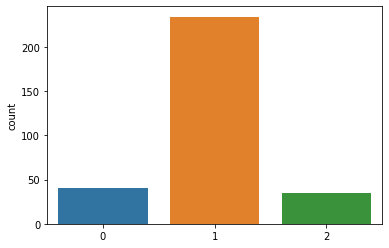

In [16]:
sns.countplot(x=preds);